#**<font color='teal'>Machine Learning Classifiers</font>**

 A classifier in machine learning is an algorithm that automatically orders or categorizes data into one or more of a set of “classes.” Classification algorithms are particularly common in machine learning because they map input data into predefined categories, making the process easier for the user. They analyze data automatically, simplify operations, and obtain useful information. 



***About Dataset***

We are using **Iris dataset** in this lab. The Iris dataset contains information about three different species of iris flowers - Iris Setosa, Iris Versicolour, and Iris Virginica. The dataset has four features - sepal length, sepal width, petal length, and petal width. Each data point represents an iris flower and is labeled with its corresponding species.

**Import necessary libraries**

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Load the iris dataset***

In [3]:
iris = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_Student_BC/Iris.csv')

**Preview the data**

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.shape

(150, 6)

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


***Data cleaning***

In [7]:
iris.isnull().sum()
# There are no NULL values in the dataset, hence it is clean.

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

***Drop unnecessary features***

In [8]:
iris = iris.drop(['Id'],axis = 1)

In [9]:
iris.shape

(150, 5)

***Select input and output features***

In [10]:
target = iris['Species']
target.shape

(150,)

In [11]:
data = iris.drop(['Species'],axis = 1)
data.shape

(150, 4)

In [12]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


***Normalize data before training***

MinMaxScaler is used for normalization of data

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

**Convert categorical variables to numerical values**

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
tr = le.fit_transform(target)
tr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

***Split data into training and testing set***

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, tr, test_size=0.2, random_state=42)
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (120, 4)
y_train (120,)
X_test (30, 4)
y_test (30,)


# **<font color='green'>Logistic Regression</font>** 

Logistic regression is a supervised machine learning algorithm mainly used for classification tasks where the goal is to predict the probability that an instance of belonging to a given class. It is used for classification algorithms its name is logistic regression. It is referred to as regression because it takes the output of the linear regression function as input and uses a sigmoid function to estimate the probability for the given class. The difference between linear regression and logistic regression is that linear regression output is the continuous value that can be anything while logistic regression predicts the probability that an instance belongs to a given class or not.

**Given an iris dataset, our task is to use logistic regression to classify iris flowers based on their features.**

***Train the Logistic Regression Model***

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

***Model prediction on test set***

In [17]:
y_pred = model.predict(X_test)

***Evaluate Model Performance using classification report***

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



***Visualize the Model Performance using confusion matrix***

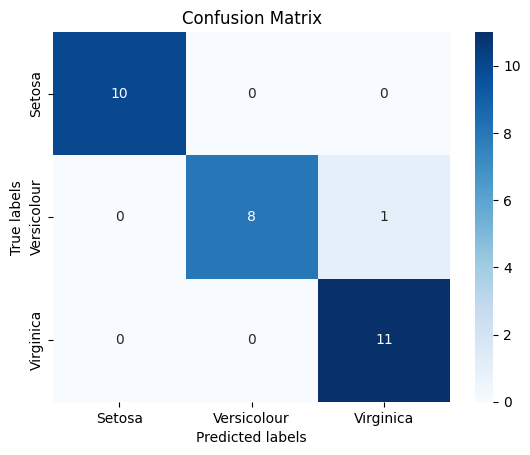

In [20]:
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Add labels, title, and axis ticks
ax.xaxis.set_ticklabels(['Setosa', 'Versicolour', 'Virginica'])
ax.yaxis.set_ticklabels(['Setosa', 'Versicolour', 'Virginica'])

# Show the plot
plt.show()

# **<font color='red'>Support Vector Machine</font>** 

Support Vector Machine or SVM is used for Classification as well as Regression problems. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane. SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. 


***Train SVM classifier***

In [21]:
from sklearn.svm import SVC

# Create a Multinomial Naive Bayes classifier object
svm_clf = SVC(kernel = 'linear',gamma = 'scale', shrinking = False,)

# Train the classifier on the training vectors and labels
svm_clf.fit(X_train, y_train)


SVC(kernel='linear', shrinking=False)

***Make predictions on the test data***

In [22]:
# Use the trained classifier to make predictions on the test vectors
y_pred = svm_clf.predict(X_test)

***Evaluate Model Performance using accuracy***

In [23]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred) 

# Print the accuracy of the classifier
print("Accuracy:", accuracy)

Accuracy: 1.0


***Visualize the Model Performance using confusion matrix***

In [24]:
# Print the confusion matrix of the classifier
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


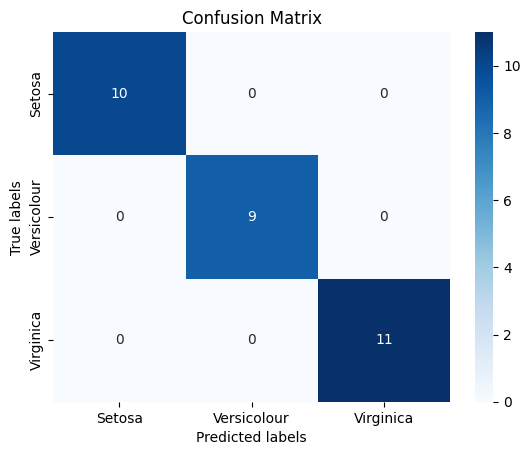

In [25]:
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Add labels, title, and axis ticks
ax.xaxis.set_ticklabels(['Setosa', 'Versicolour', 'Virginica'])
ax.yaxis.set_ticklabels(['Setosa', 'Versicolour', 'Virginica'])

# Show the plot
plt.show()

# **<font color='blue'>Naive Bayes Classifier</font>** 

Naïve Bayes classifier is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems. Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.


***Train Naive Bayes classifier***

In [26]:
from sklearn.naive_bayes import MultinomialNB

# Create a Multinomial Naive Bayes classifier object
nb_classifier = MultinomialNB()

# Train the classifier on the training vectors and labels
nb_classifier.fit(X_train, y_train)


MultinomialNB()

***Make predictions on the test data***

In [27]:
# Use the trained classifier to make predictions on the test vectors
y_pred = nb_classifier.predict(X_test)

***Evaluate Model Performance using accuracy***

In [28]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred) 

# Print the accuracy of the classifier
print("Accuracy:", accuracy)

Accuracy: 0.6333333333333333


***Visualize the Model Performance using confusion matrix***

In [29]:
# Print the confusion matrix of the classifier
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0 11  0]]


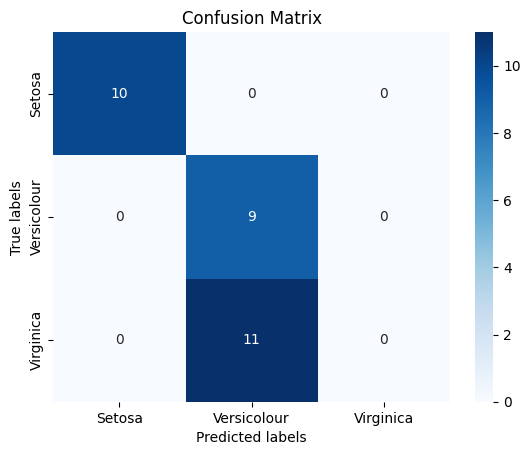

In [30]:
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Add labels, title, and axis ticks
ax.xaxis.set_ticklabels(['Setosa', 'Versicolour', 'Virginica'])
ax.yaxis.set_ticklabels(['Setosa', 'Versicolour', 'Virginica'])

# Show the plot
plt.show()

# **<font color='magenta'>K-Nearest Neighbour</font>** 

The K-Nearest Neighbour algorithm is a popular machine learning algorithm used for classification and regression tasks. It is a non-parametric algorithm that does not make any assumptions about the underlying distribution of the data. Instead, it uses the distance between the data points to determine their similarity and classify them into different classes.

***Train K-Nearest Neighbour model***

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

***Make predictions on the test data***

In [32]:
y_pred = knn.predict(X_test)

***Evaluate Model Performance***

In [33]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the classifier
print("Accuracy:", accuracy)

Accuracy: 1.0


In [34]:
# Print the confusion matrix of the classifier
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [35]:
clas = classification_report(y_test, y_pred)
print(clas)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



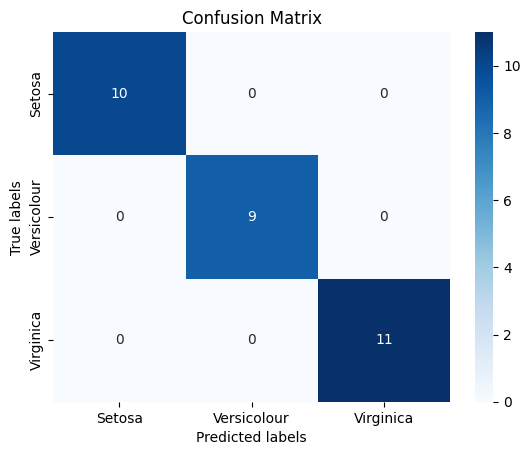

In [36]:
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Add labels, title, and axis ticks
ax.xaxis.set_ticklabels(['Setosa', 'Versicolour', 'Virginica'])
ax.yaxis.set_ticklabels(['Setosa', 'Versicolour', 'Virginica'])

# Show the plot
plt.show()

In [37]:
# # Print the correct and wrong predictions
# for i in range(len(y_pred)):
#     if y_pred[i] == y_test[i]:
#         print(f"Correct prediction: Actual label = {y_test[i]}, Predicted label = {y_pred[i]}")
#     else:
#         print(f"Wrong prediction: Actual label = {y_test[i]}, Predicted label = {y_pred[i]}")


# **<font color='green'>Decision Tree Classifier</font>**

Decision Tree Classifier is a type of supervised learning algorithm that is mostly used in classification problems. It is a tree-based model that splits the data into smaller subsets based on the features of the data. It then recursively continues this process until the data can be classified accurately. In this lab, we will be using the Iris dataset from Scikit-learn to train a Decision Tree Classifier to classify the different types of Iris flowers based on their features.

***Train Decision tree clasifier***

In [38]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

***Make predictions on the test data***

In [39]:
y_pred = clf.predict(X_test)

***Evaluate Model Performance***

In [40]:
con = confusion_matrix(y_test, y_pred)
print(con)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [41]:
clas = classification_report(y_test, y_pred)
print(clas)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



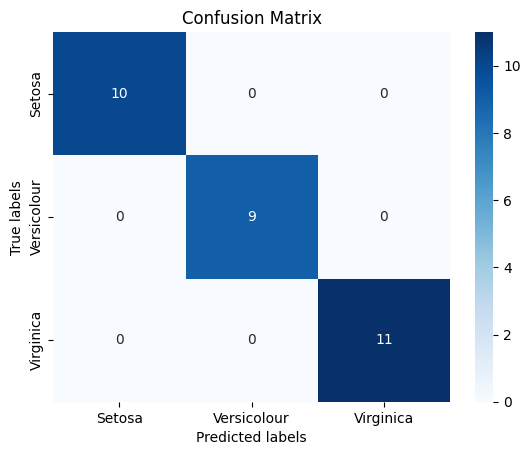

In [42]:
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Add labels, title, and axis ticks
ax.xaxis.set_ticklabels(['Setosa', 'Versicolour', 'Virginica'])
ax.yaxis.set_ticklabels(['Setosa', 'Versicolour', 'Virginica'])

# Show the plot
plt.show()

***Tune hyperparameters***

The performance of your machine learning model depends on the hyperparameters that you choose. Scikit-learn provides several tools to tune the hyperparameters. Here's an example of how to tune the max_depth hyperparameter of the decision tree classifier using grid search.

In [43]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [1, 2, 3, 4, 5]}
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 4}


# **<font color='blue'>Random Forest Classifier</font>**

Random forest or Random Decision Forest is a supervised Machine learning algorithm used for classification, regression, using decision trees.
The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. It is basically a set of decision trees (DT) from a randomly selected subset of the training set and then it collects the votes from different decision trees to decide the final prediction.

***Train Random Forest clasifier***

In [44]:
# importing random forest classifier from ensemble module
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

***Make predictions on the test data***

In [45]:
y_pred = clf.predict(X_test)

***Evaluate Model Performance***

In [46]:
con = confusion_matrix(y_test, y_pred)
print(con)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [47]:
clas = classification_report(y_test, y_pred)
print(clas)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



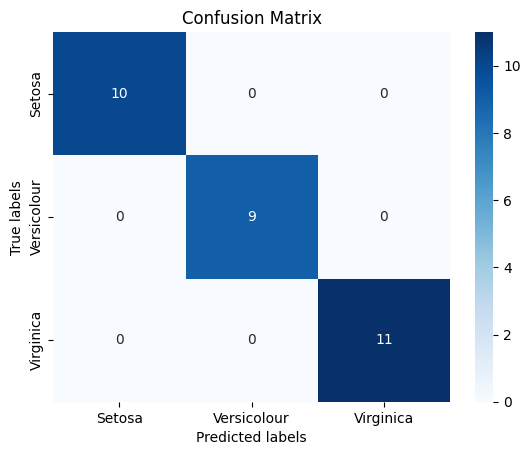

In [48]:
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Add labels, title, and axis ticks
ax.xaxis.set_ticklabels(['Setosa', 'Versicolour', 'Virginica'])
ax.yaxis.set_ticklabels(['Setosa', 'Versicolour', 'Virginica'])

# Show the plot
plt.show()